In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline

!Need to merge as well with hastags_post_profile

In [2]:
data_posts_hashtags= pd.read_csv("../data/posts_hashtags_as_array.csv")
data_posts_profiles= pd.read_csv("../data/post_profile_hashtags_as_array.csv")
data_comments= pd.read_csv("../data/comments.csv")

In [3]:
data_posts_profiles['commentCount']

0       31
1       23
2       19
3        4
4       65
        ..
3716     9
3717     9
3718    10
3719    10
3720     7
Name: commentCount, Length: 3721, dtype: int64

In [4]:
posts_all = pd.concat([data_posts_hashtags, data_posts_profiles], ignore_index=True)
posts_all = posts_all.drop_duplicates(subset='id') #There were 39 duplicate post IDs

In [5]:
comments_with_posts = pd.merge(
    data_comments,
    posts_all,
    left_on='post_id',
    right_on='id',
    how='inner'  
)

comments_with_posts

,post_id,comment_id,comment_createTimeISO_comment,text_comment,diggCount_comment,replyCommentTotal_comment,uniqueId_comment,id,text,textLanguage,...,author_digg,author_region,music_name,music_author,video_duration,video_definition,effect_sticker_names,effect_sticker_useCounts,detailed_mentions_nicknames,location_address
0,7485449276689091845,7485763126596846391,2025-03-25T15:04:30.000Z,"""im gonna move my car then you park there""me:i...",1896,20,ngelozimahlangu,7485449276689091845,Let’s go on a road trip🌸🎀 We traveled to a bea...,en,...,12000,NaN,Ototo,Asake,237,480p,[],[],[],NaN
1,7485449276689091845,7485627796623754039,2025-03-25T06:19:58.000Z,give me two years and 20 hours!,970,14,ruthmseleku,7485449276689091845,Let’s go on a road trip🌸🎀 We traveled to a bea...,en,...,12000,NaN,Ototo,Asake,237,480p,[],[],[],NaN
2,7485449276689091845,7485757818222740279,2025-03-25T14:43:58.000Z,May this type of friendship attack me😭♥️,2973,18,vukona_6,7485449276689091845,Let’s go on a road trip🌸🎀 We traveled to a bea...,en,...,12000,NaN,Ototo,Asake,237,480p,[],[],[],NaN
3,7485449276689091845,7485634830261650181,2025-03-25T06:47:17.000Z,Chelete e monate hle bathong🥺🙌🏽,7160,28,leend76,7485449276689091845,Let’s go on a road trip🌸🎀 We traveled to a bea...,en,...,12000,NaN,Ototo,Asake,237,480p,[],[],[],NaN
4,7485449276689091845,7485623097333465862,2025-03-25T06:01:30.000Z,People travel with a Bag and a tote. Can never...,193,15,ethelkgare,7485449276689091845,Let’s go on a road trip🌸🎀 We traveled to a bea...,en,...,12000,NaN,Ototo,Asake,237,480p,[],[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65614,7350335395231517994,7350397069083280174,2024-03-25T20:14:58.000Z,Does it work,71,6,dididjns,7350335395231517994,Anua has great skincare products for beginners...,en,...,3510,NaN,Righteous x Yummy - Sped Up,Tazzy,60,540p,[],[],[],NaN
65615,7326585323385916715,7328815115359437574,2024-01-27T16:25:51.000Z,girll tretinoin saved my life,1,6,jian521,7326585323385916715,soo easy and so effective! #acne #skintok #ski...,en,...,1358,NaN,super shy ft. nicki minaj,numbkarina.,26,540p,[],[],[],NaN
65616,7486279791402896670,7486305430474687278,2025-03-27T02:08:50.000Z,You should exfoliate before toner because now ...,57,6,lyscolombi,7486279791402896670,ur looking a bit crusty 🧖🧴🤍 let me overexplain...,en,...,30300,NaN,original sound,Jocie,89,540p,"[Lite Foundation,makeup,Inverted]","[0,0,0]",[],NaN
65617,7486279791402896670,7487313991221363461,2025-03-29T19:22:42.000Z,Ella de que pais es? 😭💗,10,6,valerin._12,7486279791402896670,ur looking a bit crusty 🧖🧴🤍 let me overexplain...,en,...,30300,NaN,original sound,Jocie,89,540p,"[Lite Foundation,makeup,Inverted]","[0,0,0]",[],NaN


NOTE: only 587 of all 60.000 comments are referring to the profile_posts table.
26 comments did not have a matching post_id but that is fine

We do not have a language field in comments, need to check if the one from posts is correct. you can comment in german and an english post eg

In [6]:
comments_with_posts

,post_id,comment_id,comment_createTimeISO_comment,text_comment,diggCount_comment,replyCommentTotal_comment,uniqueId_comment,id,text,textLanguage,...,author_digg,author_region,music_name,music_author,video_duration,video_definition,effect_sticker_names,effect_sticker_useCounts,detailed_mentions_nicknames,location_address
0,7485449276689091845,7485763126596846391,2025-03-25T15:04:30.000Z,"""im gonna move my car then you park there""me:i...",1896,20,ngelozimahlangu,7485449276689091845,Let’s go on a road trip🌸🎀 We traveled to a bea...,en,...,12000,NaN,Ototo,Asake,237,480p,[],[],[],NaN
1,7485449276689091845,7485627796623754039,2025-03-25T06:19:58.000Z,give me two years and 20 hours!,970,14,ruthmseleku,7485449276689091845,Let’s go on a road trip🌸🎀 We traveled to a bea...,en,...,12000,NaN,Ototo,Asake,237,480p,[],[],[],NaN
2,7485449276689091845,7485757818222740279,2025-03-25T14:43:58.000Z,May this type of friendship attack me😭♥️,2973,18,vukona_6,7485449276689091845,Let’s go on a road trip🌸🎀 We traveled to a bea...,en,...,12000,NaN,Ototo,Asake,237,480p,[],[],[],NaN
3,7485449276689091845,7485634830261650181,2025-03-25T06:47:17.000Z,Chelete e monate hle bathong🥺🙌🏽,7160,28,leend76,7485449276689091845,Let’s go on a road trip🌸🎀 We traveled to a bea...,en,...,12000,NaN,Ototo,Asake,237,480p,[],[],[],NaN
4,7485449276689091845,7485623097333465862,2025-03-25T06:01:30.000Z,People travel with a Bag and a tote. Can never...,193,15,ethelkgare,7485449276689091845,Let’s go on a road trip🌸🎀 We traveled to a bea...,en,...,12000,NaN,Ototo,Asake,237,480p,[],[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65614,7350335395231517994,7350397069083280174,2024-03-25T20:14:58.000Z,Does it work,71,6,dididjns,7350335395231517994,Anua has great skincare products for beginners...,en,...,3510,NaN,Righteous x Yummy - Sped Up,Tazzy,60,540p,[],[],[],NaN
65615,7326585323385916715,7328815115359437574,2024-01-27T16:25:51.000Z,girll tretinoin saved my life,1,6,jian521,7326585323385916715,soo easy and so effective! #acne #skintok #ski...,en,...,1358,NaN,super shy ft. nicki minaj,numbkarina.,26,540p,[],[],[],NaN
65616,7486279791402896670,7486305430474687278,2025-03-27T02:08:50.000Z,You should exfoliate before toner because now ...,57,6,lyscolombi,7486279791402896670,ur looking a bit crusty 🧖🧴🤍 let me overexplain...,en,...,30300,NaN,original sound,Jocie,89,540p,"[Lite Foundation,makeup,Inverted]","[0,0,0]",[],NaN
65617,7486279791402896670,7487313991221363461,2025-03-29T19:22:42.000Z,Ella de que pais es? 😭💗,10,6,valerin._12,7486279791402896670,ur looking a bit crusty 🧖🧴🤍 let me overexplain...,en,...,30300,NaN,original sound,Jocie,89,540p,"[Lite Foundation,makeup,Inverted]","[0,0,0]",[],NaN


In [7]:
comments_with_posts_ger_eng = comments_with_posts[comments_with_posts.textLanguage.isin(['en','de'])]
comments_with_posts_ger_eng

,post_id,comment_id,comment_createTimeISO_comment,text_comment,diggCount_comment,replyCommentTotal_comment,uniqueId_comment,id,text,textLanguage,...,author_digg,author_region,music_name,music_author,video_duration,video_definition,effect_sticker_names,effect_sticker_useCounts,detailed_mentions_nicknames,location_address
0,7485449276689091845,7485763126596846391,2025-03-25T15:04:30.000Z,"""im gonna move my car then you park there""me:i...",1896,20,ngelozimahlangu,7485449276689091845,Let’s go on a road trip🌸🎀 We traveled to a bea...,en,...,12000,NaN,Ototo,Asake,237,480p,[],[],[],NaN
1,7485449276689091845,7485627796623754039,2025-03-25T06:19:58.000Z,give me two years and 20 hours!,970,14,ruthmseleku,7485449276689091845,Let’s go on a road trip🌸🎀 We traveled to a bea...,en,...,12000,NaN,Ototo,Asake,237,480p,[],[],[],NaN
2,7485449276689091845,7485757818222740279,2025-03-25T14:43:58.000Z,May this type of friendship attack me😭♥️,2973,18,vukona_6,7485449276689091845,Let’s go on a road trip🌸🎀 We traveled to a bea...,en,...,12000,NaN,Ototo,Asake,237,480p,[],[],[],NaN
3,7485449276689091845,7485634830261650181,2025-03-25T06:47:17.000Z,Chelete e monate hle bathong🥺🙌🏽,7160,28,leend76,7485449276689091845,Let’s go on a road trip🌸🎀 We traveled to a bea...,en,...,12000,NaN,Ototo,Asake,237,480p,[],[],[],NaN
4,7485449276689091845,7485623097333465862,2025-03-25T06:01:30.000Z,People travel with a Bag and a tote. Can never...,193,15,ethelkgare,7485449276689091845,Let’s go on a road trip🌸🎀 We traveled to a bea...,en,...,12000,NaN,Ototo,Asake,237,480p,[],[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65614,7350335395231517994,7350397069083280174,2024-03-25T20:14:58.000Z,Does it work,71,6,dididjns,7350335395231517994,Anua has great skincare products for beginners...,en,...,3510,NaN,Righteous x Yummy - Sped Up,Tazzy,60,540p,[],[],[],NaN
65615,7326585323385916715,7328815115359437574,2024-01-27T16:25:51.000Z,girll tretinoin saved my life,1,6,jian521,7326585323385916715,soo easy and so effective! #acne #skintok #ski...,en,...,1358,NaN,super shy ft. nicki minaj,numbkarina.,26,540p,[],[],[],NaN
65616,7486279791402896670,7486305430474687278,2025-03-27T02:08:50.000Z,You should exfoliate before toner because now ...,57,6,lyscolombi,7486279791402896670,ur looking a bit crusty 🧖🧴🤍 let me overexplain...,en,...,30300,NaN,original sound,Jocie,89,540p,"[Lite Foundation,makeup,Inverted]","[0,0,0]",[],NaN
65617,7486279791402896670,7487313991221363461,2025-03-29T19:22:42.000Z,Ella de que pais es? 😭💗,10,6,valerin._12,7486279791402896670,ur looking a bit crusty 🧖🧴🤍 let me overexplain...,en,...,30300,NaN,original sound,Jocie,89,540p,"[Lite Foundation,makeup,Inverted]","[0,0,0]",[],NaN


After selecting only German and English 54237 rows compared to the 65619 from before

### Sentiment model

Decided to first try with a single multilingual model for simplicity and as the Monolingual Models to not really outperform the multilingual ones

**Models to choose:**
- XLM-RoBERTa (XLM-R)
    - RoBERTa variant by Facebook for 100+ languages
    - Cardiff NLP provides a Twitter-XLM-R sentiment model that was fine-tuned on tweets in 8 languages (English, German, Spanish, Italian, French, Arabic, Hindi, Portuguese)​
    - predicts Negative/Neutral/Positive
    - cardiffnlp/twitter-xlm-roberta-base-sentiment

- DistilBERT-multilingual fine-tuned for sentiment
    - the tabularisai/multilingual-sentiment-analysis model supports 22 languages including English and German​

- nlptown/bert-base-multilingual-uncased-sentiment
    - one predicts star ratings (1 to 5 stars); you could map 1-2 as negative, 3 neutral, 4-5 positive if needed.


All the above models report strong accuracy/F1 on sentiment benchmarks. For instance, the German BERT model achieved about 87% weighted F1 on a test set​, and the multilingual XLM-R model performs comparably (mid-80s F1) on both English and German tweets​. In practice, these differences (<5%) mean either approach will give reliable results, especially for a neutral vs negative/negative classification. There exist also more lightweight options like VADER Sentiment (NLTK), TextBlob, Flair NLP. Those could be uses for the baseline or small prototype but not ideal for the end result.

We wanna use a model that can handle slang and emojis.

In [8]:
pipe = pipeline("text-classification", model="cardiffnlp/twitter-xlm-roberta-base-sentiment", batch_size=32)

texts = comments_with_posts_ger_eng["text_comment"].tolist()
results = pipe(texts, truncation=True, batch_size=32)

# Convert results into DataFrame
sentiment_df = pd.DataFrame([{
    "sentiment": r["label"],
    "confidence": r["score"]
} for r in results])

# Merge back
comments_with_posts_ger_eng = comments_with_posts_ger_eng.reset_index(drop=True)
comments_with_posts_ger_eng[["sentiment", "confidence"]] = sentiment_df

Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [9]:
comments_with_posts_ger_eng[['text_comment','sentiment','confidence']]

,text_comment,sentiment,confidence
0,"""im gonna move my car then you park there""me:i...",neutral,0.629435
1,give me two years and 20 hours!,neutral,0.502584
2,May this type of friendship attack me😭♥️,positive,0.483498
3,Chelete e monate hle bathong🥺🙌🏽,positive,0.401656
4,People travel with a Bag and a tote. Can never...,negative,0.495338
...,...,...,...
54232,Does it work,neutral,0.766835
54233,girll tretinoin saved my life,positive,0.743456
54234,You should exfoliate before toner because now ...,negative,0.574968
54235,Ella de que pais es? 😭💗,neutral,0.621644


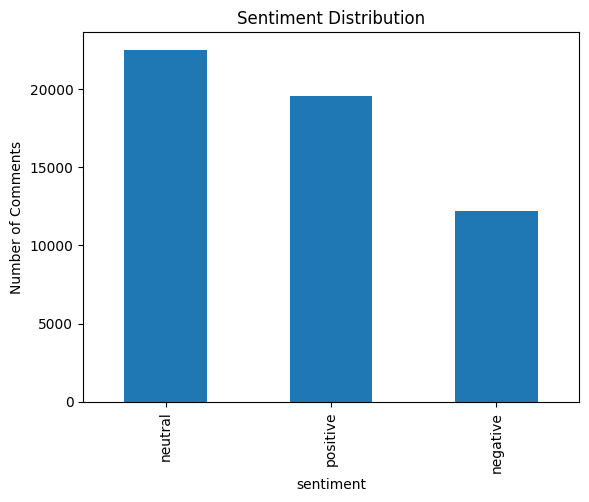

In [10]:
comments_with_posts_ger_eng["sentiment"].value_counts().plot(kind="bar", title="Sentiment Distribution")
plt.ylabel("Number of Comments")
plt.show()

In [1]:
comments_with_posts_ger_eng["confidence"].hist(bins=30)
plt.title("Confidence Score Distribution")
plt.xlabel("Confidence")
plt.ylabel("Number of Comments")
plt.show()

NameError: name 'comments_with_posts_ger_eng' is not defined

In [12]:
# Load your sentiment-labeled DataFrame
negative_comments = comments_with_posts_ger_eng[comments_with_posts_ger_eng["sentiment"] == "negative"]['text_comment']
positive_comments = comments_with_posts_ger_eng[comments_with_posts_ger_eng["sentiment"] == "positive"]['text_comment']

In [13]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
import stopwordsiso as stopwordsiso
from hdbscan import HDBSCAN

negative_comments = [comment for comment in negative_comments if len(comment.split()) > 3] #filter out short comments

# Define supported languages and extra stopwords
langs = ["en", "de", "fr", "es", "pt", "nl"]
extra_stopwords = ["im", "like", "thing", "ok", "got", "youre", "omg", "pls", "tbh", "smh", "ain't"]

# Create a list of all stopwords across languages + custom terms
stopwords_list = list(
    set(word for lang in langs for word in stopwordsiso.stopwords(lang) or [])
    .union(extra_stopwords)
)

In [14]:
# Create custom count vectorizer model
vectorizer_model = CountVectorizer(stop_words=stopwords_list)

hdbscan_model = HDBSCAN(min_cluster_size=10, min_samples=4, metric='euclidean')

# Use sentence-transformers model (fast and great for social data)
embedding_model = SentenceTransformer("all-mpnet-base-v2")  #all-MiniLM-L6-v2

topic_model = BERTopic(embedding_model=embedding_model, hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model,language="multilingual")


In [15]:
topics_positive, probs_positive = topic_model.fit_transform(positive_comments)

In [ ]:
topics_negative, probs_negative = topic_model.fit_transform(negative_comments)

In [ ]:
topic_info = topic_model.get_topic_info()
#-1 are outliers

topic_info.iloc[1]['Representative_Docs']

topic_info
topic_info[topic_info.Topic != -1].sort_values("Count", ascending=False).head(20)


,Topic,Count,Name,Representation,Representative_Docs
1,0,193,0_leider_bekommen_gesicht_poren,"[leider, bekommen, gesicht, poren, teuer, voll...","[ich hab immer pickel bekommen, wenn ich das V..."
2,1,125,1_twin_bruh_nah_stranger,"[twin, bruh, nah, stranger, blushin, lock, foe...","[#justice for cwecwe😭., 🥀nah🥀she🥀got🥀you🥀blush..."
3,2,96,2_satisfying_confused_result_purr,"[satisfying, confused, result, purr, lie, pers...","[bro why was this actually satisfying, Guys ca..."
4,3,93,3_comments_hating_school_jealous,"[comments, hating, school, jealous, people, ig...",[I think embriegh and Cesar broke up their not...
5,4,93,4_oily_dry_skin_winter,"[oily, dry, skin, winter, moisturizer, tight, ...","[I have Oily skin that don’t work for me, i do..."
6,5,82,5_pores_pore_filaments_sebaceous,"[pores, pore, filaments, sebaceous, clogged, c...",[How do you get such small pores? Nothing seem...
7,6,77,6_acne_hormonal_insecurity_biggest,"[acne, hormonal, insecurity, biggest, confiden...","[Hormonal acne makes me want to die 😻😻, y’all ..."
8,7,71,7_jealous_dream_achieve_care,"[jealous, dream, achieve, care, complaining, h...","[Even I’m jealous of her skin, Your skin looks..."
9,8,71,8_tape_mouth_strap_mask,"[tape, mouth, strap, mask, sleep, ear, ears, s...",[I started using a chin strap instead of mouth...
10,9,65,9_cucumber_slime_rice_eat,"[cucumber, slime, rice, eat, milk, frozen, tas...","[Not me chewing frozen cucumber 😩😩, but my fat..."


In [ ]:
negative_comments_df = comments_with_posts_ger_eng[comments_with_posts_ger_eng["sentiment"] == "negative"]
negative_comments_df["topic"] = topics_negative
negative_comments_df["topic_probability"] = probs_negative

negative_comments_df_cleaned = negative_comments_df[
    (negative_comments_df["topic"] != -1) &
    (negative_comments_df["topic_probability"] > 0.7)
]


negative_comments_df_cleaned[["text_comment", "topic","topic_probability" ]]

,text_comment,topic,topic_probability
7,Ich weiß langsam nicht mehr weiter meine Haut ...,0,1.000000
33,I see this after the breakup💔,2,1.000000
41,speed cry when u left😭,106,1.000000
48,GIRL I WAS SO CONFUSED WITH THE INTRO😭😭😭😭,2,0.889112
58,That dark shade is nottt dark at all,148,0.972736
...,...,...,...
65555,yall hating but shes beautifyl,54,1.000000
65579,im too lazy for thiss😭,61,1.000000
65581,crying in acne and red acne scars😭,48,1.000000
65582,it's expensive as hell 😭,17,1.000000


- 4: oily skin
- 5: pores
- 6: acne
- 8: face mask, mouth tape, ears?
- 9: rice
- 12: oil cleanser
- 13: sunscreen
- 14: body hair
- 15: toner
- 17: expensive
- 19: asking for products
- 20: Korean, Asian, American skincare

In [ ]:
positive_comments_df = comments_with_posts_ger_eng[comments_with_posts_ger_eng["sentiment"] == "positive"]
positive_comments_df["topic"] = topics_positive
positive_comments_df["topic_probability"] = probs_positive

positive_comments_df_cleaned = positive_comments_df[
    (positive_comments_df["topic"] != -1) &
    (positive_comments_df["topic_probability"] > 0.7)
]

positive_comments_df_cleaned[["text_comment", "topic","topic_probability" ]]

,text_comment,topic,topic_probability
5,I have it 😍,330,0.918226
23,hair removal cream is the best thing ever I wa...,272,1.000000
24,I use a electric razor and let me tell you I’m...,272,1.000000
40,She’s wearing the necklace ishowspeed got herrr😍,4,0.807626
42,girl ur HAIR ROUTINE IS WHAT I NEEEDDD,174,1.000000
...,...,...,...
65565,"THIS WORKS ! if U r oily skin, might not work ...",381,1.000000
65576,Die habe ich auch 😊,1,1.000000
65587,I need this bad!!,243,1.000000
65589,which tretinoin you use dear?? I eagerly waiti...,444,1.000000


In [ ]:
positive_comments_df_cleaned[positive_comments_df_cleaned["topic"] == 3][["text_comment", "topic"]].head(20)

,text_comment,topic
843,korean skincare till i die ❤️🔥,3
1122,Korean skin care is a life saver 🩷😭,3
1623,Literally almost fully using Korean skincare a...,3
2667,Korean skincare is the best,3
2669,I loveeee korean skincare,3
2683,Korean skin care has changed my life.,3
2698,Korean skincare and beauty is fantastic,3
2779,Welcome to the Korean skincare world. I starte...,3
2782,Korean skincare is top tier,3
2787,Korean skincare is the best!!,3


**Positive comments - Interesting clusters**

- 3: love for korean skincare
- 8: routine
- 11: people buy the product
- 12: need to try this
- 18: no makeup
- 20: sunscreen

In [ ]:
def prepare_weekly_topic_trends(df, date_col="createTimeISO", post_col="post_id", topic_col="topic", min_posts=5):
    """
    Prepares normalized topic trends by week (comments per post).

    Parameters:
        df (pd.DataFrame): Input DataFrame with date, post_id, and topic columns.
        date_col (str): Column name for datetime info.
        post_col (str): Column name for the post identifier.
        topic_col (str): Column name for topic labels.
        min_posts (int): Minimum number of posts per week to keep the week.

    Returns:
        pd.DataFrame: Weekly topic trends with normalized comment counts.
    """
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])

    # Weekly topic comment counts
    topic_counts = (
        df
        .groupby([df[date_col].dt.to_period("W"), df[topic_col]])
        .size()
        .reset_index(name="comment_count")
    )

    # Weekly post counts
    post_counts = (
        df
        .groupby(df[date_col].dt.to_period("W"))[post_col]
        .nunique()
        .reset_index(name="post_count")
    )

    # Merge & normalize
    topic_over_time = topic_counts.merge(post_counts, on=date_col)
    topic_over_time["comments_per_post"] = topic_over_time["comment_count"] / topic_over_time["post_count"]

    # Convert Period to Timestamp
    topic_over_time[date_col] = topic_over_time[date_col].dt.to_timestamp()

    # Filter out weeks with very few posts
    topic_over_time = topic_over_time[topic_over_time["post_count"] >= min_posts]

    return topic_over_time

In [ ]:
topic_trends_positive = prepare_weekly_topic_trends(positive_comments_df_cleaned)
topic_trends_negative = prepare_weekly_topic_trends(negative_comments_df_cleaned)

In [ ]:
def plot_smoothed_topics(
    df,
    topic_names,
    start_date="2024-04-01",
    window=3,
    figsize=(12, 6),
    title="Normalized Topic Trends Since April 2024"
):
    """
    Plots smoothed topic trends over time using a rolling average.

    Parameters:
        df (pd.DataFrame): The output of prepare_weekly_topic_trends().
        topic_names (dict): Mapping of topic ID to display names.
        start_date (str or pd.Timestamp): Date to start plotting from.
        window (int): Rolling window size for smoothing.
        figsize (tuple): Size of the plot.
        title (str): Title of the plot.
    """
    start_date = pd.to_datetime(start_date)
    selected_topics = list(topic_names.keys())

    # Filter data
    topic_over_time = df[
        (df["createTimeISO"] >= start_date) &
        (df["topic"].isin(selected_topics))
    ]

    # Plot
    plt.figure(figsize=figsize)
    for topic in selected_topics:
        data = topic_over_time[topic_over_time["topic"] == topic].copy()

        # Apply rolling average
        data["smoothed"] = data["comments_per_post"].rolling(window=window, min_periods=1).mean()

        plt.plot(data["createTimeISO"], data["smoothed"], label=topic_names[topic])

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Avg Comments per Post")
    plt.legend(title="Topic")
    plt.tight_layout()
    plt.show()


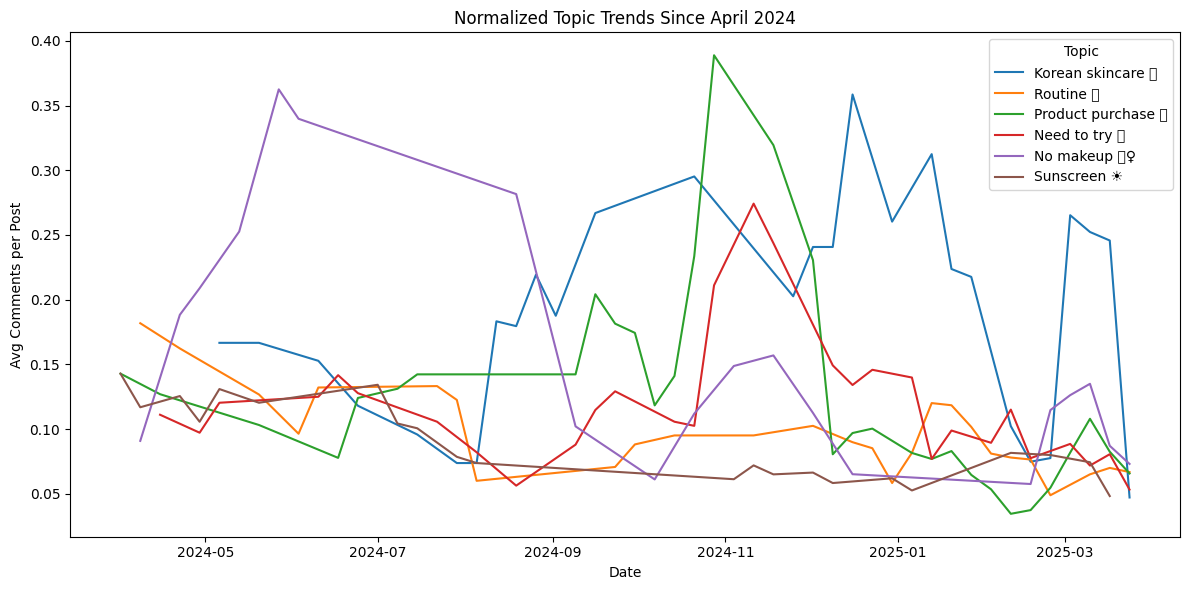

In [ ]:
topic_names = {
    3: "Korean skincare 💕",
    8: "Routine 🔁",
    11: "Product purchase 🛍️",
    12: "Need to try 🌟",
    18: "No makeup 🧖‍♀️",
    20: "Sunscreen ☀️"
}

plot_smoothed_topics(
    df=topic_trends_positive,
    topic_names=topic_names,
    window=3  # 3-week smoothing
)

In [ ]:
topic_names = {
    3: "Korean skincare 💕",
    4: "Oily skin 😓",
    5: "Pores 🔬",
    6: "Acne breakouts 😬",
    8: "Face mask / Mouth tape / Ears? 😷🩹",
    9: "Rice skincare 🌾",
    12: "Oil cleanser 🧴",
    13: "Sunscreen ☀️",
    14: "Body hair care 🪒",
    15: "Toner routine 💧",
    17: "Too expensive 💸",
    18: "No makeup 🧖‍♀️",
    20: "Skincare by region 🌍 (Korean/Asian/American)"
}

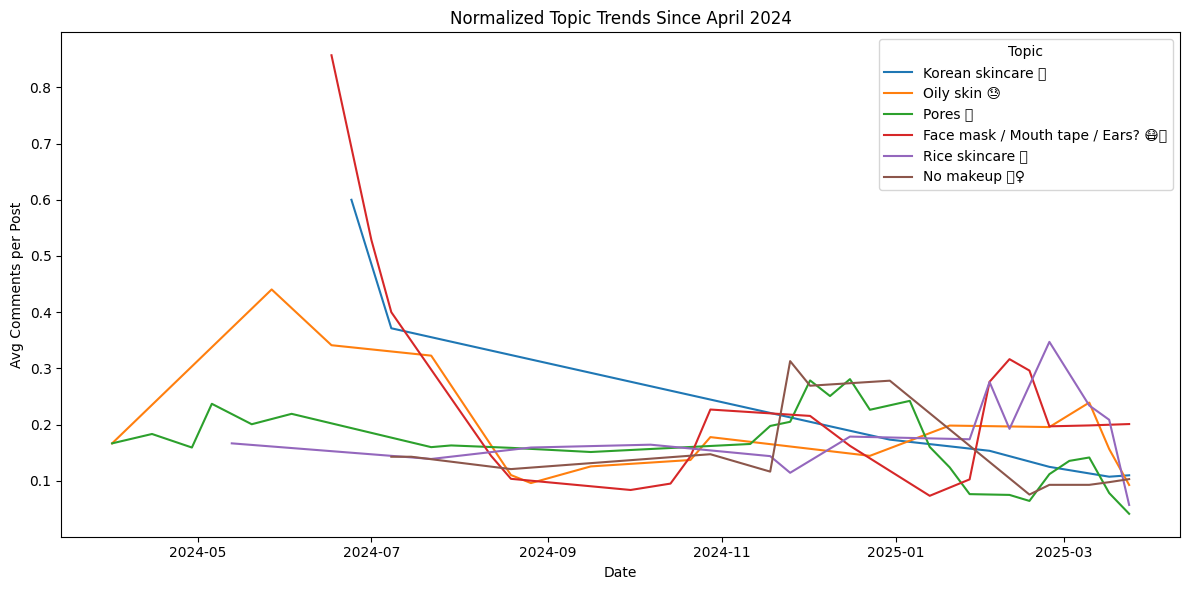

In [ ]:
topic_names = {
    3: "Korean skincare 💕",
    4: "Oily skin 😓",
    5: "Pores 🔬",
    8: "Face mask / Mouth tape / Ears? 😷🩹",
    9: "Rice skincare 🌾",
    18: "No makeup 🧖‍♀️",
}

plot_smoothed_topics(
    df=topic_trends_negative,
    topic_names=topic_names,
    window=3  # 3-week smoothing
)